# VIRAT KOHLI CENTURY DATA ANALYSIS
Data Source: WikiPedia Table(https://en.wikipedia.org/wiki/List_of_international_cricket_centuries_by_Virat_Kohli)

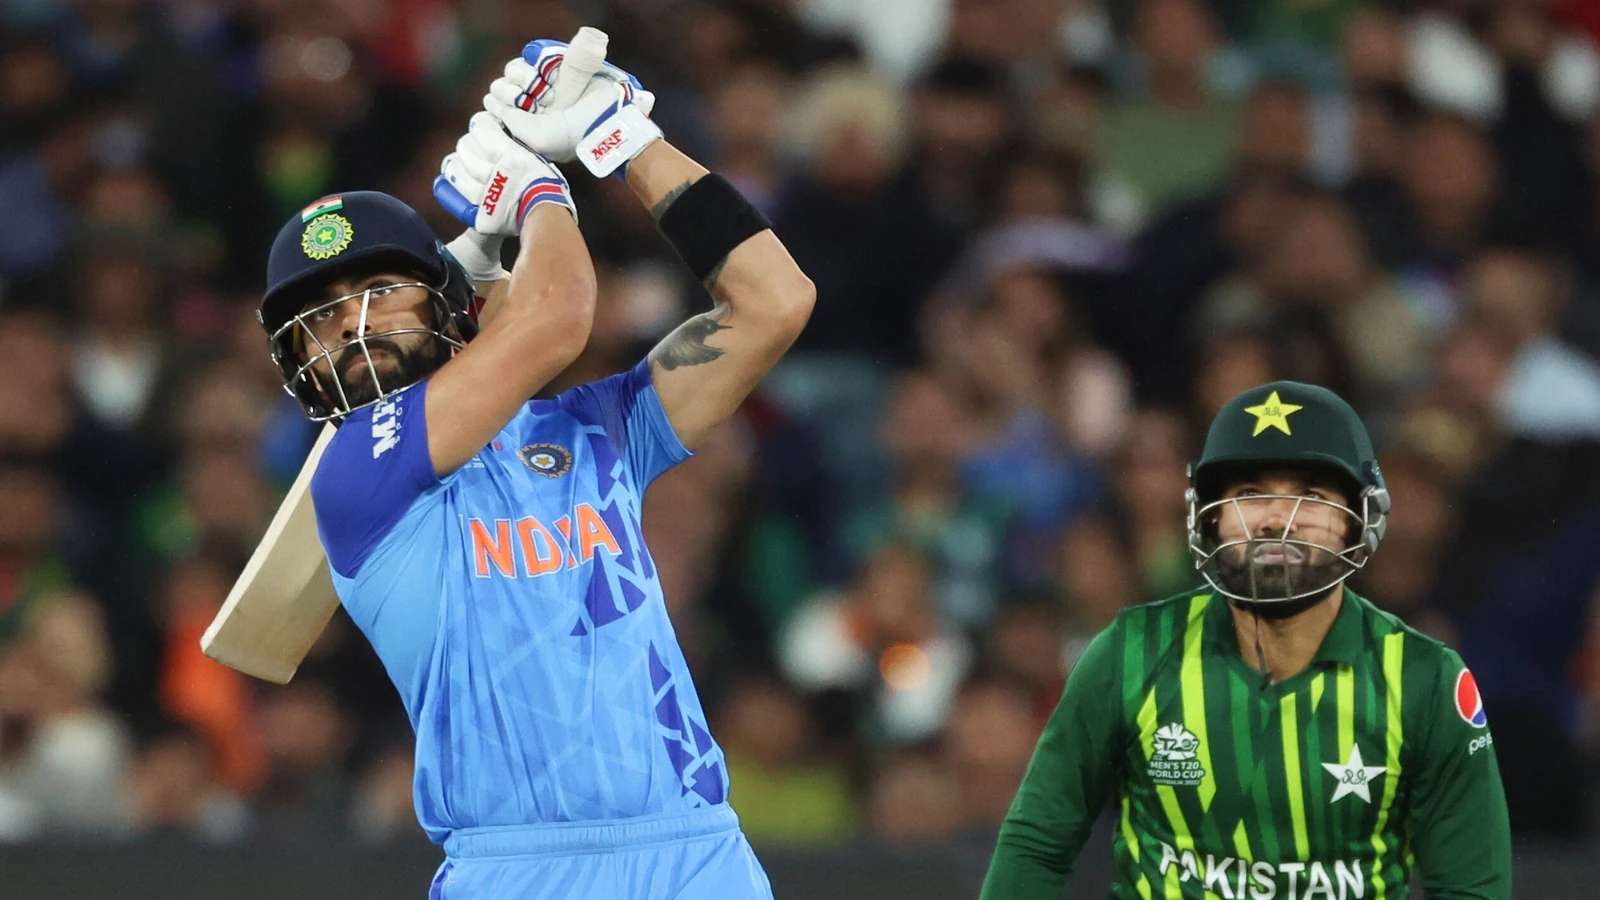

In [1]:
#Dispaly Image using Image

from IPython import display
display.Image('virat.jpg',width=420,height=640)

#### Courtesy: Hindustan Times

In [2]:
#Importing required libraries

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

## Reading CSV file using pandas

In [3]:
kohli_df = pd.read_csv("virat_all_century.csv")

### Exploring data and its type

In [4]:
#Exploring columns and first 5 centuries

kohli_df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [5]:
#Exploring columns and recent 5 centuries

kohli_df.tail()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
70,71,122*,Afghanistan,2,1,"Dubai International Cricket Stadium, Dubai",Neutral,08-Sep-22,Won
71,72,113,Bangladesh,3,1,"Zohur Ahmed Chowdhury Stadium, Chittagong",Away,10-Dec-22,Won
72,73,113,Sri Lanka,3,1,"ACA Stadium, Guwahati",Home,10-Jan-23,Won
73,74,166*,Sri Lanka,3,1,"Greenfield International Stadium, Thiruvananth...",Home,15-Jan-23,Won
74,75,186,Australia,4,2,"Narendra Modi Stadium, Ahmedabad",Home,09-Mar-23,Drawn


In [6]:
# Number of rows and column using shape 

kohli_df.shape

(75, 9)

In [7]:
#Description of the numerical column data in the dataframe

kohli_df.describe()

,No.,Position,Innings
count,75.000000,75.000000,75.000000
mean,38.000000,3.520000,1.706667
std,21.794495,0.664953,0.673300
min,1.000000,2.000000,1.000000
25%,19.500000,3.000000,1.000000
50%,38.000000,3.000000,2.000000
75%,56.500000,4.000000,2.000000
max,75.000000,6.000000,4.000000


In [8]:
# prints information about the dataframe

kohli_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No.       75 non-null     int64 
 1   Runs      75 non-null     object
 2   Against   75 non-null     object
 3   Position  75 non-null     int64 
 4   Innings   75 non-null     int64 
 5   Venue     75 non-null     object
 6   Ground    75 non-null     object
 7   Date      75 non-null     object
 8   Result    75 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.4+ KB


In [9]:
#finds data type of each column in the given dataframe

kohli_df.dtypes

No.          int64
Runs        object
Against     object
Position     int64
Innings      int64
Venue       object
Ground      object
Date        object
Result      object
dtype: object

## Reformating of data types in dataframe

### Changing Date Column dtype

In [10]:
# coverting date column object datatype to datetime

kohli_df['Date'] = pd.to_datetime(kohli_df['Date'],format='%d-%b-%y')

In [11]:
kohli_df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won


### Creating/Updating new columns using existing column in data frame

In [12]:
# creating a new column year 
kohli_df['Year'] = kohli_df['Date'].dt.year
kohli_df['Runs']=kohli_df['Runs'].astype(str)
kohli_df.dtypes

No.                  int64
Runs                object
Against             object
Position             int64
Innings              int64
Venue               object
Ground              object
Date        datetime64[ns]
Result              object
Year                 int64
dtype: object

In [13]:
# Determining Out or Not-Out using asterix charcter at end of runs

kohli_df['Out/Not-Out']=kohli_df['Runs'].str.contains(r'[^\w\s]', regex=True)
kohli_df.loc[kohli_df['Out/Not-Out'] == True, 'Out/Not-Out'] = 'Not Out' 
kohli_df.loc[kohli_df['Out/Not-Out'] == False, 'Out/Not-Out'] = 'Out'

In [14]:
# Changing Runs format from string to integer

kohli_df['Runs'] = kohli_df['Runs'].str.replace(r'[^\w\s]', '')
kohli_df['Runs']=kohli_df['Runs'].astype(str).astype(int)

C:\Users\kumar\AppData\Local\Temp\ipykernel_17712\2451060588.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  kohli_df['Runs'] = kohli_df['Runs'].str.replace(r'[^\w\s]', '')


In [15]:
kohli_df.head()

,No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year,Out/Not-Out
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,2009,Out
1,2,102,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,2010,Not Out
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,2010,Out
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,2010,Out
4,5,100,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,2011,Not Out


## Counting centuries in different criteria

In [16]:
# maximum runs scored

kohli_df['Runs'].max()

254

In [17]:
# century count anginst team

kohli_df['Against'].value_counts()

 Australia       16
 Sri Lanka       15
 West Indies     11
 New Zealand      8
 England          8
 South Africa     7
 Bangladesh       6
 Pakistan         2
 Zimbabwe         1
 Afghanistan      1
Name: Against, dtype: int64

In [18]:
#century count at different position

kohli_df['Position'].value_counts()

3    39
4    31
5     3
6     1
2     1
Name: Position, dtype: int64

In [19]:
# century count in different innings

kohli_df['Innings'].value_counts()

2    41
1    29
3     3
4     2
Name: Innings, dtype: int64

In [20]:
# century count at diffrent venue

kohli_df['Venue'].value_counts().head()

Adelaide Oval, Adelaide                          5
Sher-e-Bangla Cricket Stadium, Dhaka             4
Eden Gardens, Kolkata                            3
Queen's Park Oval, Port of Spain                 3
Maharashtra Cricket Association Stadium, Pune    3
Name: Venue, dtype: int64

In [21]:
# century count at Home,Away or Neutal Venues

kohli_df['Ground'].value_counts()

Home       35
Away       35
Neutral     5
Name: Ground, dtype: int64

In [22]:
# century count in Results Win, Loss or Others

kohli_df['Result'].value_counts()

Won           51
Lost          13
Drawn          8
Lost (D/L)     1
Won (D/L)      1
Tied           1
Name: Result, dtype: int64

In [23]:
# century count in Out or Not-Out

kohli_df['Out/Not-Out'].value_counts()

Out        54
Not Out    21
Name: Out/Not-Out, dtype: int64

In [24]:
# century count year-wise
kohli_df['Year'].value_counts()

2017    11
2018    11
2012     8
2014     8
2016     7
2019     7
2013     6
2011     4
2015     4
2010     3
2023     3
2022     2
2009     1
Name: Year, dtype: int64

## Data Visualizations

### Number of Century against each team

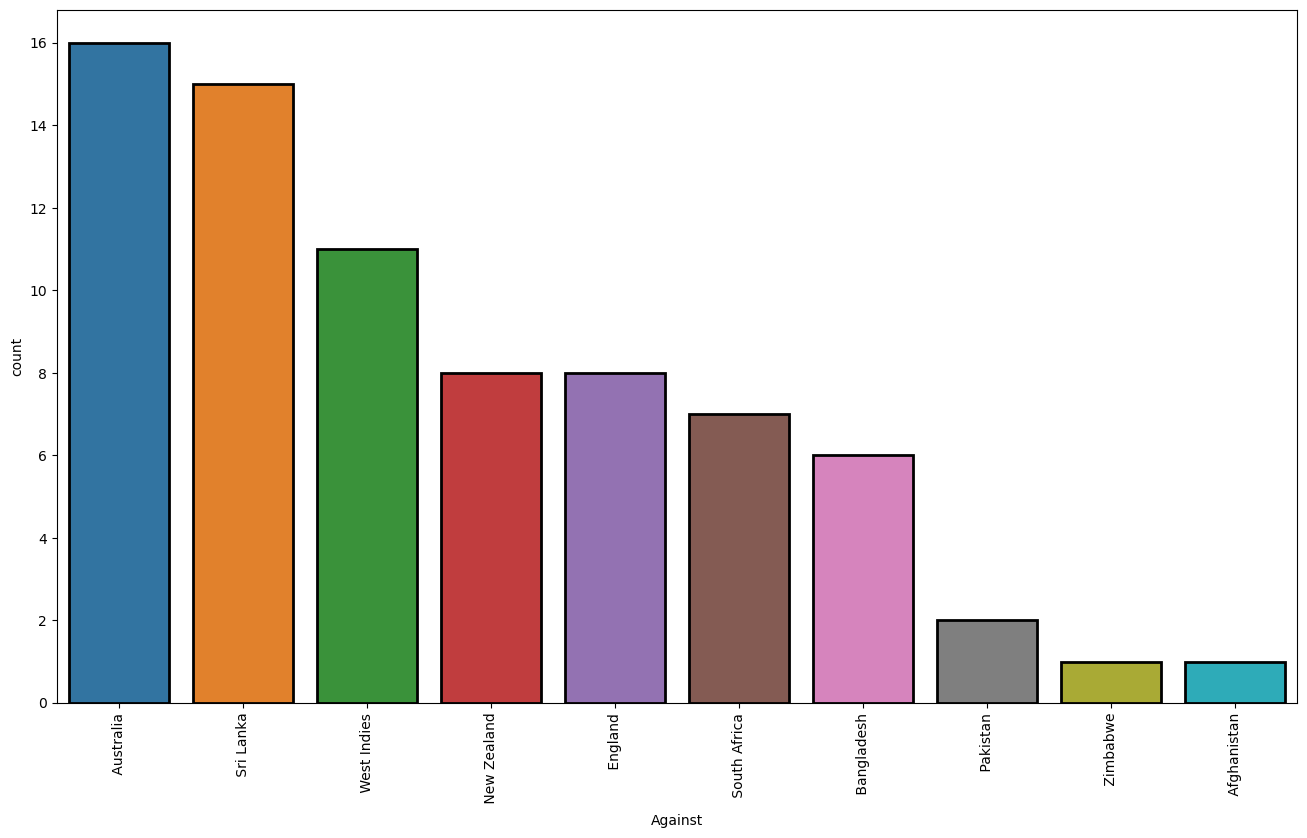

In [25]:
# count plot of column named against

fig=plt.figure(figsize=(16,9))
sns.countplot(data=kohli_df,x="Against",edgecolor='black',linewidth=2,order=kohli_df["Against"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Number of century in different position

[]

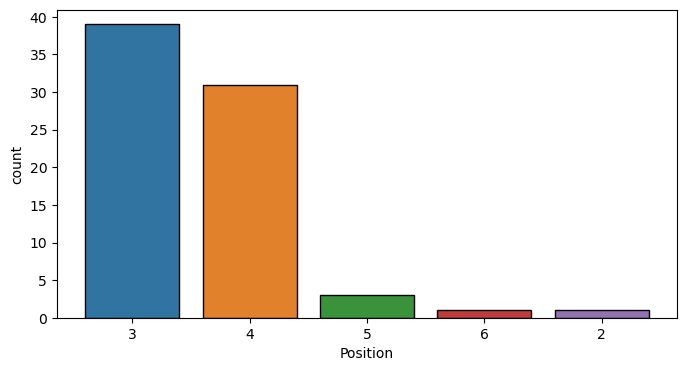

In [26]:
# count plot at position
fig=plt.figure(figsize=(8,4))
sns.countplot(data=kohli_df,x="Position",edgecolor='black',order=kohli_df["Position"].value_counts().index)
plt.plot()

## Number of Century innings wise VS different team

[]

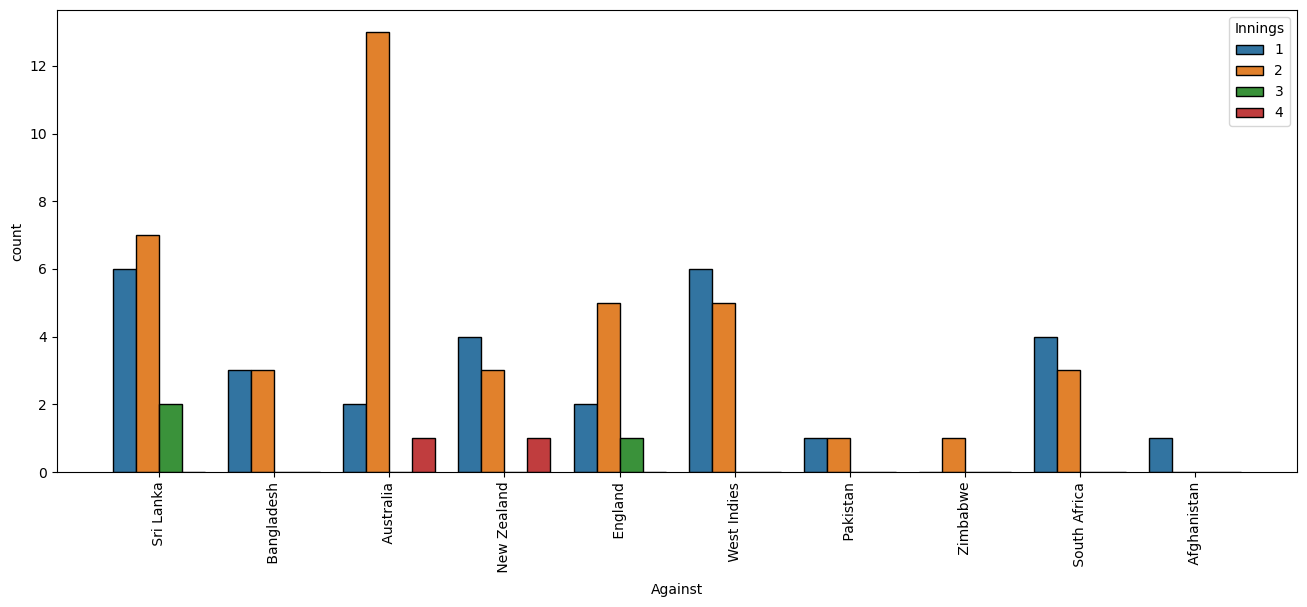

In [27]:
# # count plot against opponent with grouping of inning using hue 
fig=plt.figure(figsize=(16,6))
sns.countplot(data=kohli_df,x="Against",hue="Innings",edgecolor='black')
plt.xticks(rotation=90)
plt.plot()

### Number of Century innings wise VS different team

[]

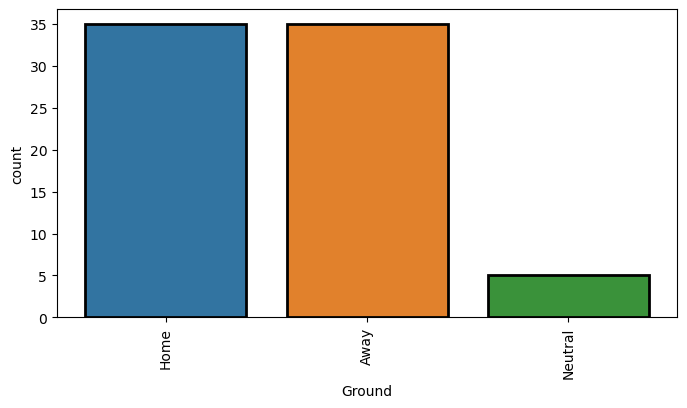

In [28]:
fig=plt.figure(figsize=(8,4))
sns.countplot(data=kohli_df,x="Ground",edgecolor='black',linewidth=2)
plt.xticks(rotation=90)
plt.plot()

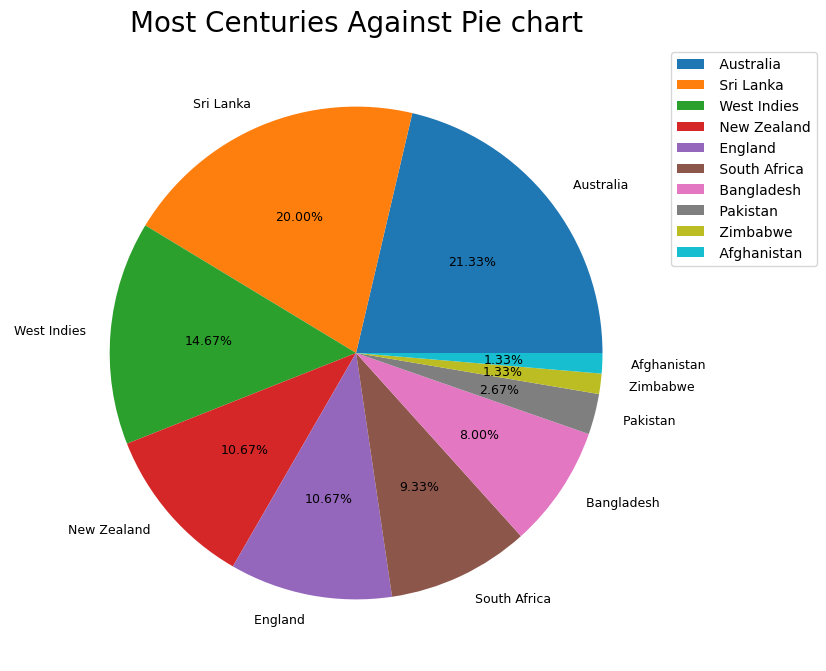

In [31]:
label = kohli_df['Against'].value_counts()
plt.figure(figsize = (15,8))
plt.pie(label, labels=label.index, autopct='%1.2f%%', textprops={'fontsize':9})
plt.title('Most Centuries Against Pie chart', fontdict={"fontsize":20}, pad=10)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

## At last a video of shot played by Virat Kohli VS Pakistan in ICC T20 WC

In [32]:
# Displaying video window

display.Video('virat_six.mp4',width=896,height=504,)

#### Courtesy: ICC